In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import os

import warnings
warnings.filterwarnings("ignore", message="Found unknown categories", category=UserWarning)

In [2]:
base_directory = os.getcwd()
path_2020 = base_directory + "/Input/2020/"
path_2021 = base_directory + "/Input/2021/"
path_2022 = base_directory + "/Input/2022/"
path_2023 = base_directory + "/Input/2023/"

In [3]:
# reading in all the categories of data for 2020-2023

c20 = pd.read_csv(path_2020 + "CrashMap_CIRCUMSTANCES_20.csv")
d20 = pd.read_csv(path_2020 + "CrashMap_DRIVER_20.csv")
n20 = pd.read_csv(path_2020 + "CrashMap_NONMOTORIST_20.csv")
p20 = pd.read_csv(path_2020 + "CrashMap_PASSENGER_20.csv")
r20 = pd.read_csv(path_2020 + "CrashMap_REPORT_20.csv")
v20 = pd.read_csv(path_2020 + "CrashMap_VEHICLE_20.csv")

c21 = pd.read_csv(path_2021 + "CrashMap_CIRCUMSTANCES_21.csv")
d21 = pd.read_csv(path_2021 + "CrashMap_DRIVER_21.csv")
n21 = pd.read_csv(path_2021 + "CrashMap_NONMOTORIST_21.csv")
p21 = pd.read_csv(path_2021 + "CrashMap_PASSENGER_21.csv")
r21 = pd.read_csv(path_2021 + "CrashMap_REPORT_21.csv")
v21 = pd.read_csv(path_2021 + "CrashMap_VEHICLE_21.csv")

c22 = pd.read_csv(path_2022 + "CrashMap_CIRCUMSTANCES_22.csv")
d22 = pd.read_csv(path_2022 + "CrashMap_DRIVER_22.csv")
n22 = pd.read_csv(path_2022 + "CrashMap_NONMOTORIST_22.csv")
p22 = pd.read_csv(path_2022 + "CrashMap_PASSENGER_22.csv")
r22 = pd.read_csv(path_2022 + "CrashMap_REPORT_22.csv")
v22 = pd.read_csv(path_2022 + "CrashMap_VEHICLE_22.csv")

c23 = pd.read_csv(path_2023 + "CrashMap_CIRCUMSTANCES_23.csv")
d23 = pd.read_csv(path_2023 + "CrashMap_DRIVER_23.csv")
n23 = pd.read_csv(path_2023 + "CrashMap_NONMOTORIST_23.csv")
p23 = pd.read_csv(path_2023 + "CrashMap_PASSENGER_23.csv")
r23 = pd.read_csv(path_2023 + "CrashMap_REPORT_23.csv")
v23 = pd.read_csv(path_2023 + "CrashMap_VEHICLE_23.csv")

C:\Users\denap\AppData\Local\Temp\ipykernel_2876\3837069151.py:7: DtypeWarning: Columns (23,32) have mixed types. Specify dtype option on import or set low_memory=False.
  r20 = pd.read_csv(path_2020 + "CrashMap_REPORT_20.csv")
C:\Users\denap\AppData\Local\Temp\ipykernel_2876\3837069151.py:14: DtypeWarning: Columns (23,24,32) have mixed types. Specify dtype option on import or set low_memory=False.
  r21 = pd.read_csv(path_2021 + "CrashMap_REPORT_21.csv")
C:\Users\denap\AppData\Local\Temp\ipykernel_2876\3837069151.py:15: DtypeWarning: Columns (7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  v21 = pd.read_csv(path_2021 + "CrashMap_VEHICLE_21.csv")
C:\Users\denap\AppData\Local\Temp\ipykernel_2876\3837069151.py:21: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  r22 = pd.read_csv(path_2022 + "CrashMap_REPORT_22.csv")
C:\Users\denap\AppData\Local\Temp\ipykernel_2876\3837069151.py:22: DtypeWarning: Col

In [4]:
# Merging data for every year

merged_20 = pd.merge(c20, d20, on='Reportnumber', how='outer')
merged_20 = pd.merge(merged_20, n20, on='Reportnumber', how='outer')
merged_20 = pd.merge(merged_20, p20, on='Reportnumber', how='outer')
merged_20 = pd.merge(merged_20, r20, on='Reportnumber', how='outer')
merged_20 = pd.merge(merged_20, v20, on='Reportnumber', how='outer')

merged_21 = pd.merge(c21, d21, on='Reportnumber', how='outer')
merged_21 = pd.merge(merged_21, n21, on='Reportnumber', how='outer')
merged_21 = pd.merge(merged_21, p21, on='Reportnumber', how='outer')
merged_21 = pd.merge(merged_21, r21, on='Reportnumber', how='outer')
merged_21 = pd.merge(merged_21, v21, on='Reportnumber', how='outer')

merged_22 = pd.merge(c22, d22, on='Reportnumber', how='outer')
merged_22 = pd.merge(merged_22, n22, on='Reportnumber', how='outer')
merged_22 = pd.merge(merged_22, p22, on='Reportnumber', how='outer')
merged_22 = pd.merge(merged_22, r22, on='Reportnumber', how='outer')
merged_22 = pd.merge(merged_22, v22, on='Reportnumber', how='outer')

merged_23 = pd.merge(c23, d23, on='Reportnumber', how='outer')
merged_23 = pd.merge(merged_23, n23, on='Reportnumber', how='outer')
merged_23 = pd.merge(merged_23, p23, on='Reportnumber', how='outer')
merged_23 = pd.merge(merged_23, r23, on='Reportnumber', how='outer')
merged_23 = pd.merge(merged_23, v23, on='Reportnumber', how='outer')

In [5]:
# df_main = pd.concat([merged_21, merged_22, merged_23], ignore_index=True)
df_main = merged_23
df_main = df_main.drop_duplicates(subset=['Reportnumber', 'Vehicleid'])

In [6]:
def get_generation(dob):
    # Convert string date to datetime object
    dob_date = pd.to_datetime(dob)
    
    # Define generation ranges based on birth years
    generations = {
        "Silent Generation": (pd.Timestamp('1900-01-01'), pd.Timestamp('1945-12-31')),
        "Baby Boomers": (pd.Timestamp('1946-01-01'), pd.Timestamp('1964-12-31')),
        "Generation X": (pd.Timestamp('1965-01-01'), pd.Timestamp('1980-12-31')),
        "Millennials": (pd.Timestamp('1981-01-01'), pd.Timestamp('1996-12-31')),
        "Generation Z": (pd.Timestamp('1997-01-01'), pd.Timestamp.now())
    }
    
    # Determine the generation based on the date of birth
    for generation, (start_date, end_date) in generations.items():
        if start_date <= dob_date <= end_date:
            return generation
    
    return "Unknown"

# Apply the function to the "DriverDOB" column
df_main['DriverDOB'] = df_main['DriverDOB'].apply(get_generation)

In [7]:
# Change time of crash from HH:MM to just the hour
df_main['Timeofcrash'] = df_main['Timeofcrash'].str.split(':').str[0]
df_main['Timeofcrash'] = df_main['Timeofcrash'].astype(int)

In [8]:
# Create a new column called day for the day of the week the crash took place on
df_main['day'] = (pd.to_datetime(df_main['Crashdate'])).dt.day_name()

In [9]:
# For visualization purposes, only show 1 crash at each coordinate, instead of overlapping points when multiple
# cars are involved
df_visualization = df_main.drop_duplicates(subset=['Reportnumber', 'Latitude', 'Longitude'])

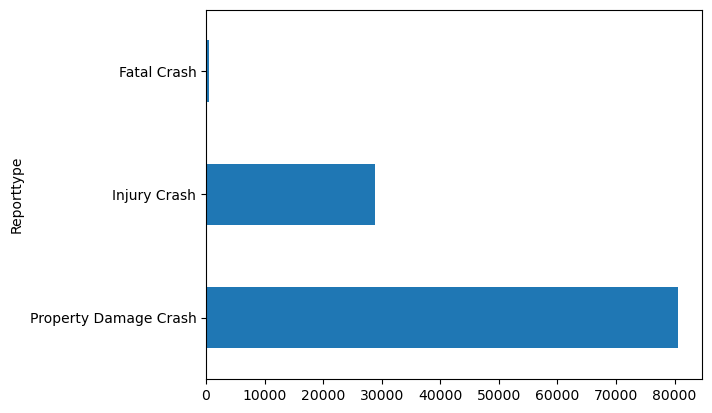

In [10]:
import matplotlib.pyplot as plt

df_visualization.Reporttype.value_counts().plot.barh()
plt.show()

In [11]:
# Remove outlier points that are located outside Maryland borders

import geopandas as gpd

# Load the GeoDataFrame containing the boundary of Maryland
maryland_boundary = gpd.read_file('Input/maryland.geojson')  # Replace 'maryland_boundary.shp' with the actual file path

# Convert the DataFrame into a GeoDataFrame
gdf = gpd.GeoDataFrame(df_visualization, geometry=gpd.points_from_xy(df_visualization.Longitude, df_visualization.Latitude))

# Perform a spatial join to identify points inside Maryland
df_visualization = gpd.sjoin(gdf, maryland_boundary, op='within')

# Extract the original DataFrame with only the points inside Maryland
df_visualization = df_visualization.drop(columns=['index_right', 'geometry', 'name'])


C:\Users\denap\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\denap\AppData\Local\Temp\ipykernel_2876\1641219160.py:12: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  df_visualization = gpd.sjoin(gdf, maryland_boundary, op='within')


In [12]:
# Small subset of data for visualization purposes
df_subset = df_visualization.head(1000)

In [13]:
# Consider injury and fatal crashes because they are more important and less random than property damage crashes
df_injury_fatal = df_visualization[(df_visualization['Reporttype'] == 'Injury Crash') | (df_visualization['Reporttype'] == 'Fatal Crash')]

In [14]:
# Map showing the number of crashes by county

import folium
import geopandas as gpd

# Load the GeoJSON file containing Maryland county boundaries
geojson_file = 'Input/maryland-counties.geojson'  # Path to your GeoJSON file
counties = gpd.read_file(geojson_file)

# # Aggregate crash data by county
crash_count_by_county = df_visualization.groupby('CountyOfCrash').size().reset_index(name='CrashCount')

# # Merge GeoJSON data with crash counts
choropleth_data = pd.merge(counties, crash_count_by_county, left_on='name', right_on='CountyOfCrash', how='left')
choropleth_data = choropleth_data.drop(columns=['name'])
choropleth_data = choropleth_data[['CountyOfCrash', 'CrashCount', 'geometry']]

# # Create choropleth map
m = folium.Map(location=[39.045753, -76.641273], zoom_start=8)  # Centered on Maryland

crash_by_county_layer = folium.Choropleth(
    geo_data=choropleth_data,
    name='choropleth',
    data=choropleth_data,
    columns=['CountyOfCrash', 'CrashCount'],
    key_on='feature.properties.CountyOfCrash',
    fill_color='YlOrRd',  # Choose your color scheme
    line_weight=1,
    line_opacity=0.7,
    legend_name='Crash Count by County',
    highlight=True)

folium.GeoJsonTooltip(['CountyOfCrash', 'CrashCount'], style = """background-color: white;border: 1px solid #ccc;padding: 10px;
font-family: Arial, sans-serif;font-size: 12px;line-height: 1.4;text-align: left;max-width: 300px;""").add_to(crash_by_county_layer.geojson)

crash_by_county_layer.add_to(m)

folium.LayerControl().add_to(m)

m

In [15]:
# Heat Map

from folium.plugins import HeatMap

# Create a folium map centered on the mean of points
mymap = folium.Map(location=[38.68296438904334, -76.87243652676005], zoom_start=14)

# Convert the DataFrame into a list of points
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df_injury_fatal.iterrows()]

# Add heatmap to the map
folium.plugins.HeatMap(heat_data, name="Heat Map Layer").add_to(mymap)

folium.LayerControl().add_to(mymap)

# mymap.save("Visualization Helper/crash_heatmap.html")

mymap

In [16]:
# Roads with the most crashes
df_injury_fatal['Road Name'].value_counts()[:25]

Road Name
CAPITAL BELTWAY            657
NO NAME                    527
EISENHOWER MEMORIAL HWY    516
BALTO BELTWAY              508
CRAIN HWY                  400
PULASKI HWY                310
OCEAN GATEWAY              265
LIBERTY RD                 234
J F K MEMORIAL HWY         231
BELAIR RD                  205
THREE NOTCH RD             196
WASHINGTON BLVD            195
GEORGIA AVE                195
FREDERICK RD               188
REISTERSTOWN RD            187
GOV RITCHIE HWY            183
JOHN HANSON HWY            177
ANNAPOLIS RD               169
SOLOMONS ISLAND RD         167
BRANCH AVE                 149
NEW HAMPSHIRE AVE          147
YORK RD                    141
BALTIMORE AVE              139
COLUMBIA PIKE              137
BALTO NATIONAL PIKE        131
Name: count, dtype: int64

In [17]:
# Map of Crash Clusters

from folium.plugins import MarkerCluster

# Create a folium map centered on the mean of points
mymap = folium.Map(location=[df_subset['Latitude'].mean(), df_subset['Longitude'].mean()], zoom_start=14)

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(mymap)

# Add markers to the MarkerCluster
for index, row in df_subset.iterrows():
    popup_content = f"Report Number: {row['Reportnumber']}<br>Latitude: {row['Latitude']}<br>Longitude: {row['Longitude']}"
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=folium.Popup(popup_content)).add_to(marker_cluster)

mymap

In [18]:
df_injury_fatal.Collisiontype.value_counts()

Collisiontype
Same Direction Rear End               6878
Straight Movement Angle               6236
Single Vehicle                        6028
Other                                 3470
Head On Left Turn                     1944
Same Direction Sideswipe              1366
Head On                               1016
Same Direction Left Turn               540
Same Direction Right Turn              432
Opposite Direction Sideswipe           245
Angle Meets Left Turn                  228
Angle Meets Left Head On               132
Same Direction Rear End Left Turn      131
Angle Meets Right Turn                 125
Unknown                                 84
Same Direction Rear End Right Turn      77
Same Direction Both Left Turn           55
Opposite Direction Both Left Turn       45
Name: count, dtype: int64

In [19]:
head_on_collisions = df_injury_fatal[(df_injury_fatal['Collisiontype'] == 'Head On') | (df_injury_fatal['Collisiontype'] == 'Head On Left Turn')]
head_on_collisions = df_injury_fatal[(df_injury_fatal['day'] == 'Friday') | (df_injury_fatal['day'] == 'Saturday')]

head_on_fatalities = head_on_collisions[head_on_collisions['Reporttype'] == 'Fatal Crash'].shape[0]
head_on_injuries = head_on_collisions[head_on_collisions['Reporttype'] == 'Injury Crash'].shape[0]

# Calculate the total number of fatalities and injuries in the entire dataset
total_fatalities = df_injury_fatal[df_injury_fatal['Reporttype'] == 'Fatal Crash'].shape[0]
total_injuries = df_injury_fatal[df_injury_fatal['Reporttype'] == 'Injury Crash'].shape[0]

# Calculate the percentages
percentage_fatalities_in_head_on = (head_on_fatalities / total_fatalities) * 100
percentage_injuries_in_head_on = (head_on_injuries / total_injuries) * 100

print("Percentage of fatalities in head-on collisions: {:.2f}%".format(percentage_fatalities_in_head_on))
print("Percentage of injuries in head-on collisions: {:.2f}%".format(percentage_injuries_in_head_on))

Percentage of fatalities in head-on collisions: 29.14%
Percentage of injuries in head-on collisions: 30.29%


In [20]:
tuesday_crashes = df_visualization[df_visualization['day'] == 'Tuesday'].shape[0]
total_crashes = df_visualization.shape[0]
percentage_crashes_tuesday = (tuesday_crashes / total_crashes) * 100

print("Percentage of crashes on Tuesday: {:.2f}%".format(percentage_crashes_tuesday))
print("Expected Percent: {:.2f}%".format(100/7))

Percentage of crashes on Tuesday: 13.82%
Expected Percent: 14.29%


In [21]:
weekday_crashes = df_visualization[(df_visualization['day'] == 'Monday') | (df_visualization['day'] == 'Tuesday') | (df_visualization['day'] == 'Wednesday') | (df_visualization['day'] == 'Thursday') | (df_visualization['day'] == 'Friday')]
num_weekday_crashes = weekday_crashes.shape[0]
percentage_crashes_weekday = (num_weekday_crashes / total_crashes) * 100

print("Percentage of crashes on Weekdays: {:.2f}%".format(percentage_crashes_weekday))
print("Expected Percent: {:.2f}%".format(500/7))

Percentage of crashes on Weekdays: 71.68%
Expected Percent: 71.43%


In [22]:
df_visualization.DriverAirbagDeployed.value_counts()

DriverAirbagDeployed
Not Deployed              64792
Deployed - Combination    11240
Deployed - Front           9473
Deployed - Unknown         6375
Deployed - Side            1946
Deployed - Curtain          477
Deployed - Other            151
Name: count, dtype: int64

In [23]:
df_injury_fatal.DriverAirbagDeployed.value_counts()

DriverAirbagDeployed
Not Deployed              15240
Deployed - Combination     5560
Deployed - Front           3890
Deployed - Unknown          931
Deployed - Side             749
Deployed - Curtain          187
Deployed - Other             60
Name: count, dtype: int64

In [24]:
# df = df[(df['col'] < -0.25) | (df['col'] > 0.25)]
no_airbag_collisions = df_injury_fatal[(df_injury_fatal['DriverAirbagDeployed'] == 'Not Deployed')]

no_airbag_fatalities = no_airbag_collisions[no_airbag_collisions['Reporttype'] == 'Fatal Crash'].shape[0]
no_airbag_injuries = no_airbag_collisions[no_airbag_collisions['Reporttype'] == 'Injury Crash'].shape[0]

# Calculate the total number of fatalities and injuries in the entire dataset
total_fatalities = df_injury_fatal[df_injury_fatal['Reporttype'] == 'Fatal Crash'].shape[0]
total_injuries = df_injury_fatal[df_injury_fatal['Reporttype'] == 'Injury Crash'].shape[0]

# Calculate the percentages
percentage_fatalities_in_no_airbag = (no_airbag_fatalities / total_fatalities) * 100
percentage_injuries_in_no_airbag = (no_airbag_injuries / total_injuries) * 100

print("Percentage of fatalities in no airbag collisions: {:.2f}%".format(percentage_fatalities_in_no_airbag))
print("Percentage of injuries in no airbag collisions: {:.2f}%".format(percentage_injuries_in_no_airbag))
# 40.29% of fatalities had an airbag that was not deployed

Percentage of fatalities in no airbag collisions: 40.29%
Percentage of injuries in no airbag collisions: 52.12%


In [25]:
df_visualization.DriverDOB.value_counts()

DriverDOB
Millennials          30970
Unknown              22099
Generation X         20608
Generation Z         19520
Baby Boomers         14127
Silent Generation     2369
Name: count, dtype: int64

In [26]:
old_drivers = df_injury_fatal[(df_injury_fatal['DriverDOB'] == 'Baby Boomers') | (df_injury_fatal['DriverDOB'] == 'Silent Generation')]

old_fatalities = old_drivers[old_drivers['Reporttype'] == 'Fatal Crash'].shape[0]
old_injuries = old_drivers[old_drivers['Reporttype'] == 'Injury Crash'].shape[0]

# Calculate the total number of fatalities and injuries in the entire dataset
total_fatalities = df_injury_fatal[df_injury_fatal['Reporttype'] == 'Fatal Crash'].shape[0]
total_injuries = df_injury_fatal[df_injury_fatal['Reporttype'] == 'Injury Crash'].shape[0]

# Calculate the percentages
percentage_fatalities_in_old = (old_fatalities / total_fatalities) * 100
percentage_injuries_in_old = (old_injuries / total_injuries) * 100

print("Percentage of fatalities in old driver collisions: {:.2f}%".format(percentage_fatalities_in_old))
print("Percentage of injuries in old driver collisions: {:.2f}%".format(percentage_injuries_in_old))

Percentage of fatalities in old driver collisions: 20.86%
Percentage of injuries in old driver collisions: 18.39%


In [27]:
young_drivers = df_injury_fatal[df_injury_fatal['DriverDOB'] == 'Generation Z']

young_fatalities = young_drivers[young_drivers['Reporttype'] == 'Fatal Crash'].shape[0]
young_injuries = young_drivers[young_drivers['Reporttype'] == 'Injury Crash'].shape[0]

# Calculate the total number of fatalities and injuries in the entire dataset
total_fatalities = df_injury_fatal[df_injury_fatal['Reporttype'] == 'Fatal Crash'].shape[0]
total_injuries = df_injury_fatal[df_injury_fatal['Reporttype'] == 'Injury Crash'].shape[0]

# Calculate the percentages
percentage_fatalities_in_young = (young_fatalities / total_fatalities) * 100
percentage_injuries_in_young = (young_injuries / total_injuries) * 100

print("Percentage of fatalities in young driver collisions: {:.2f}%".format(percentage_fatalities_in_young))
print("Percentage of injuries in young driver collisions: {:.2f}%".format(percentage_injuries_in_young))

Percentage of fatalities in young driver collisions: 19.06%
Percentage of injuries in young driver collisions: 20.12%


In [28]:
df_injury_fatal.CircumstancesCode.value_counts()

CircumstancesCode
Failed to Give Full Time and Attention               1710
Wet                                                   724
Under Influence of Alcohol                            540
Too Fast for Conditions                               389
Fell Asleep, Fainted                                  382
Failed to Yield Right of Way                          313
Ran Off the Road                                      277
Inattentive                                           244
Physical/Mental Difficulty                            229
Failure to Drive Within a Single Lane                 216
Other Improper Action                                 155
Exceeded the Speed Limit                              126
Under Influence of Drugs                              115
Failed to Keep Right of Center                         75
Swerved to Avoid Vehicle or Object in Road             69
Over Correcting/Steering                               56
Failed to Obey Traffic Signal                         

In [29]:
fast_crashes = df_injury_fatal[(df_injury_fatal['CircumstancesCode'] == 'Too Fast for Conditions') | (df_injury_fatal['CircumstancesCode'] == 'Exceeded the Speed Limit')]

fast_crash_fatalities = fast_crashes[fast_crashes['Reporttype'] == 'Fatal Crash'].shape[0]
fast_crash_injuries = fast_crashes[fast_crashes['Reporttype'] == 'Injury Crash'].shape[0]

# Calculate the total number of fatalities and injuries in the entire dataset
total_fatalities = df_injury_fatal[df_injury_fatal['Reporttype'] == 'Fatal Crash'].shape[0]
total_injuries = df_injury_fatal[df_injury_fatal['Reporttype'] == 'Injury Crash'].shape[0]

# Calculate the percentages
percentage_fatalities_in_fast = (fast_crash_fatalities / total_fatalities) * 100
percentage_injuries_in_fast = (fast_crash_injuries / total_injuries) * 100

print("Percentage of fatalities in high speed collisions: {:.2f}%".format(percentage_fatalities_in_fast))
print("Percentage of injuries in high speed collisions: {:.2f}%".format(percentage_injuries_in_fast))

Percentage of fatalities in high speed collisions: 4.32%
Percentage of injuries in high speed collisions: 1.70%


In [30]:
df_injury_fatal.Collisiontype.value_counts()

Collisiontype
Same Direction Rear End               6878
Straight Movement Angle               6236
Single Vehicle                        6028
Other                                 3470
Head On Left Turn                     1944
Same Direction Sideswipe              1366
Head On                               1016
Same Direction Left Turn               540
Same Direction Right Turn              432
Opposite Direction Sideswipe           245
Angle Meets Left Turn                  228
Angle Meets Left Head On               132
Same Direction Rear End Left Turn      131
Angle Meets Right Turn                 125
Unknown                                 84
Same Direction Rear End Right Turn      77
Same Direction Both Left Turn           55
Opposite Direction Both Left Turn       45
Name: count, dtype: int64

In [31]:
driverless_crashes = df_injury_fatal[df_injury_fatal['Driverlessvehicle'] == 'Y']

driverless_fatalities = driverless_crashes[driverless_crashes['Reporttype'] == 'Fatal Crash'].shape[0]
driverless_injuries = driverless_crashes[driverless_crashes['Reporttype'] == 'Injury Crash'].shape[0]

# Calculate the total number of fatalities and injuries in the entire dataset
total_fatalities = df_injury_fatal[df_injury_fatal['Reporttype'] == 'Fatal Crash'].shape[0]
total_injuries = df_injury_fatal[df_injury_fatal['Reporttype'] == 'Injury Crash'].shape[0]

# Calculate the percentages
percentage_fatalities_in_driverless = (driverless_fatalities / total_fatalities) * 100
percentage_injuries_in_driverless = (driverless_injuries / total_injuries) * 100

print("Percentage of fatalities in driverless car collisions: {:.2f}%".format(percentage_fatalities_in_driverless))
print("Percentage of injuries in driverless car collisions: {:.2f}%".format(percentage_injuries_in_driverless))

Percentage of fatalities in driverless car collisions: 0.54%
Percentage of injuries in driverless car collisions: 1.17%
